In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Correlation between the different rating categories
* Seaborn and Scipy packages have been used in addition to Pandas, Numpy and Matplotlib
* Among the eight rating categories : **_Nurse Communication, Doctor Communication, Pain Management and Care Transition_** have the highest positive correlation with the overall rating. This implies that these four factors impact the overall rating the most and this impact is in a positive fashion, meaning that, for example, a higher pain management corresponds to a higher overall rating.

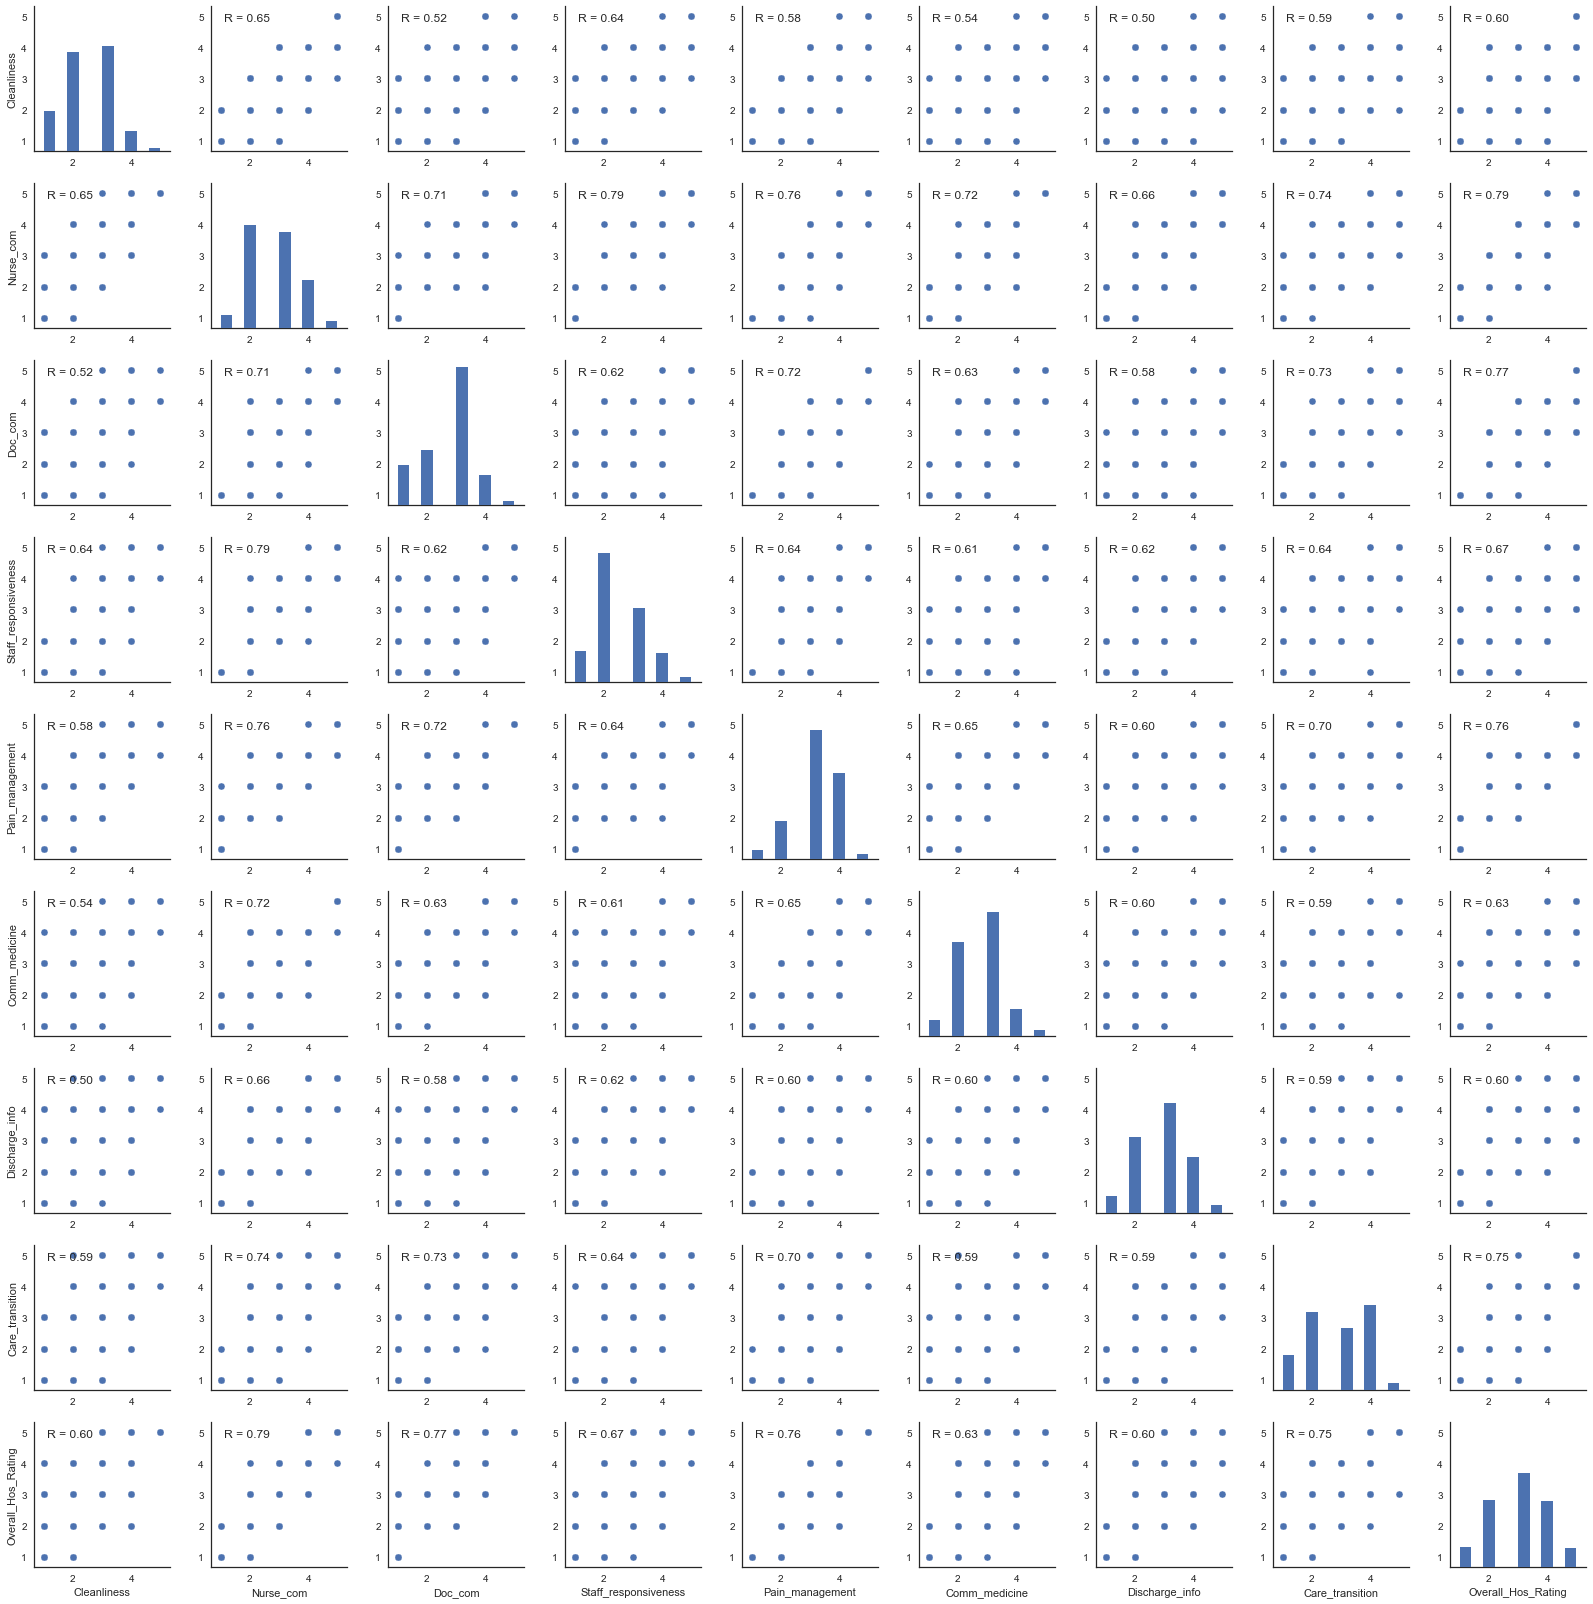

In [9]:
hos_merged = pd.read_csv("../Cleaned_Data/Hospital Ratings Merged.csv")

#sns.pairplot(hos_merged['Cleanliness':'Overall_Hos_Rating'])
#plt.show()
df = hos_merged.loc[:, 'Cleanliness':'Overall_Hos_Rating']
#df.head()
#sns.pairplot(df)
#plt.show()

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("R = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(df)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
plt.savefig("Correlation_Graphs.png",bbox_inches="tight")
plt.show()

In [10]:
grouped_hos_owner = hos_merged.groupby(["Hospital Ownership"])
grouped_hos_type = hos_merged.groupby(["Hospital Type"])
grouped_hos_county = hos_merged.groupby(["County Name"])


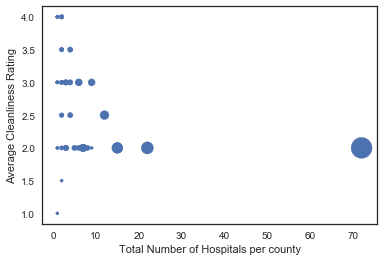

In [11]:
hospital_count_county = grouped_hos_county["Provider ID"].count()
hospital_clean_rate = grouped_hos_county ["Cleanliness"].median()
city_count_county = grouped_hos_county["City"].nunique()
plt.scatter(hospital_count_county, hospital_clean_rate, s=10*city_count_county)
plt.xlabel("Total Number of Hospitals per county")
plt.ylabel("Average Cleanliness Rating")
plt.show()

## Box Plot analyzing the Hospital Ownerships effect on Hospital Ratings
* Among the different hospital ownerships, government-federal hospitals have the most consistent scores with respect to all the ratings from multiple surveys. More precisely, the scores of government-federal hospitals are rather compactly distributed around the average which means that a consistent service is offered within the government-federal hospitals.

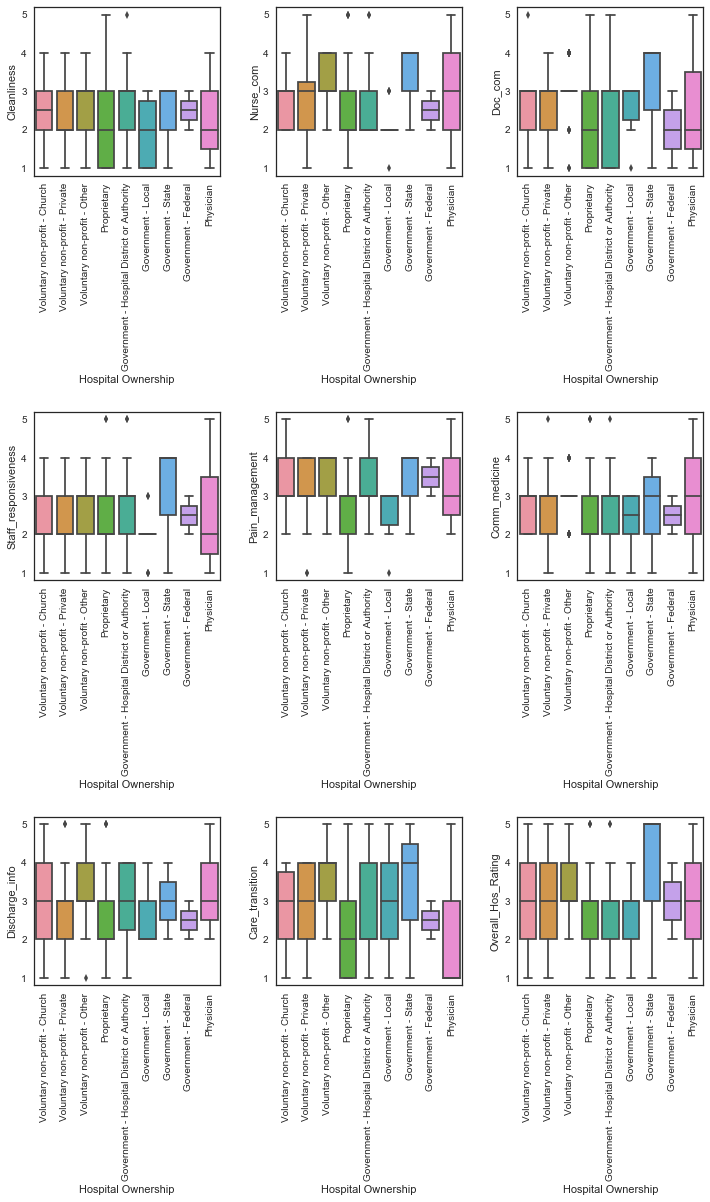

,Provider ID,Cleanliness,Nurse_com,Doc_com,Staff_responsiveness,Pain_management,Comm_medicine,Discharge_info,Care_transition,Overall_Hos_Rating,...,Summary_star,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership
0,50002,2,2,2,2,2,2,2,1,2,...,2,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,ALAMEDA,5107826200,Acute Care Hospitals,Voluntary non-profit - Church
1,50006,2,2,2,2,3,2,3,2,2,...,2,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,95501,HUMBOLDT,7074458121,Acute Care Hospitals,Voluntary non-profit - Private
2,50007,3,4,3,3,4,3,3,4,5,...,4,MILLS-PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,94010,SAN MATEO,6506965270,Acute Care Hospitals,Voluntary non-profit - Private
3,50008,2,2,3,2,3,2,2,2,3,...,2,CALIFORNIA PACIFIC MEDICAL CTR-DAVIES CAMPUS HOSP,601 DUBOCE AVE,SAN FRANCISCO,CA,94117,SAN FRANCISCO,4156006000,Acute Care Hospitals,Voluntary non-profit - Other
4,50009,2,3,3,3,3,3,3,2,3,...,3,QUEEN OF THE VALLEY MEDICAL CENTER,1000 TRANCAS ST,NAPA,CA,94558,NAPA,7072524411,Acute Care Hospitals,Voluntary non-profit - Church


In [12]:
#sns.boxplot(x=hos_merged['Hospital Ownership'], y=hos_merged['Cleanliness'], data=hos_merged)
#plt.xticks(rotation=90)
#plt.show()
fig = plt.figure(figsize=(12,18))
fig.subplots_adjust(hspace=1.4, wspace=.3)
for idx, col in enumerate(hos_merged.columns[1:10]):
    fig.add_subplot(3, 3, idx+1)
    sns.boxplot(x=hos_merged['Hospital Ownership'], y=hos_merged[col], data=hos_merged)
    plt.xticks(rotation=90)
plt.savefig("HospitalType_Rating_BoxPlot.png",bbox_inches="tight" )
plt.show()
hos_merged.head()

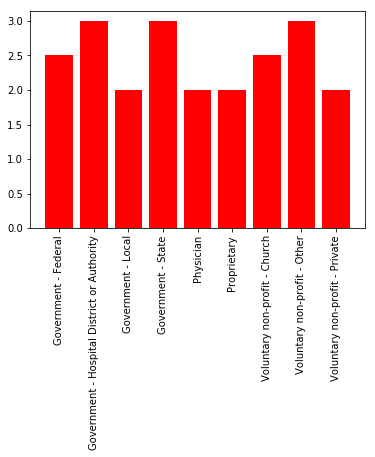

In [100]:
hos_clean_median = grouped_hos_owner["Cleanliness"].median()
x_axis = np.arange(len(hos_clean_median))
plt.bar(x_axis, hos_clean_median, color='r')
plt.xticks(x_axis, list(hos_clean_median.index), rotation="vertical")
plt.show()

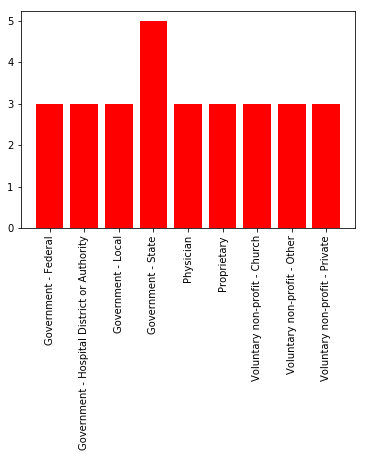

In [103]:
hos_overall_median = grouped_hos_owner["Overall_Hos_Rating"].median()
x_axis = np.arange(len(hos_overall_median))
plt.bar(x_axis, hos_overall_median, color='r')
plt.xticks(x_axis, list(hos_overall_median.index), rotation="vertical")
plt.show()

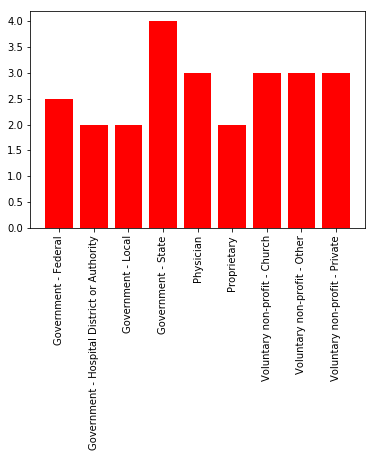

In [105]:
hos_nurse_median = grouped_hos_owner["Nurse_com"].median()
x_axis = np.arange(len(hos_nurse_median))
plt.bar(x_axis, hos_nurse_median, color='r')
plt.xticks(x_axis, list(hos_nurse_median.index), rotation="vertical")
plt.show()